# Public bike share dataset downloaded from Kaggle


### Data was downloaded from https://www.kaggle.com/datasets/daesunryu/public-dataset-from-bikesharecompany and uploaded by user DAESUN RYU (https://www.kaggle.com/daesunryu)


### Data included features such as the bike type, start and end locations, if the rider was a member or not, ride length, and ride date. We will use these features to explore the data, create new features, make casual inference about the data, and see if we can create a predict how far a rider will travel!

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#read data
bike = pd.read_csv('case_file.csv')

/Users/user/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (6,8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
bike.head(5)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,ride_length,start_date1,week_day
0,74346,5DB63F4E4EB6A9CF,docked_bike,2020-04-01 00:00:30,2020-04-01 00:23:03,Damen Ave & Wellington Ave,162,Pine Grove Ave & Waveland Ave,232.0,41.9359,-87.6784,41.9493,-87.6463,casual,2020-04-01 00:00:30,2020-04-01 00:23:03,0 days 00:22:33,2020-04-01 00:00:00,Tuesday
1,46139,1FD159E93F7BAFA1,docked_bike,2020-04-01 00:02:35,2020-04-01 00:10:45,Wabash Ave & 16th St,72,Wabash Ave & 9th St,321.0,41.8604,-87.6258,41.8708,-87.6257,member,2020-04-01 00:02:35,2020-04-01 00:10:45,0 days 00:08:10,2020-04-01 00:00:00,Tuesday
2,17735,6D93A270684EC452,docked_bike,2020-04-01 00:02:41,2020-04-01 00:24:20,Damen Ave & Wellington Ave,162,Spaulding Ave & Armitage Ave,506.0,41.9359,-87.6784,41.9171,-87.7102,casual,2020-04-01 00:02:41,2020-04-01 00:24:20,0 days 00:21:39,2020-04-01 00:00:00,Tuesday
3,53075,091D47E4F0FC5022,docked_bike,2020-04-01 00:06:44,2020-04-01 00:14:01,Mies van der Rohe Way & Chicago Ave,173,Clark St & Schiller St,301.0,41.8969,-87.6217,41.9080,-87.6315,member,2020-04-01 00:06:44,2020-04-01 00:14:01,0 days 00:07:17,2020-04-01 00:00:00,Tuesday
4,46138,07F785C9DDA3404C,docked_bike,2020-04-01 00:11:18,2020-04-01 00:11:51,Wabash Ave & 9th St,321,Wabash Ave & 9th St,321.0,41.8708,-87.6257,41.8708,-87.6257,member,2020-04-01 00:11:18,2020-04-01 00:11:51,0 days 00:00:33,2020-04-01 00:00:00,Tuesday


In [4]:
#throws error if not converted
bike['start_time']=pd.to_datetime(bike['start_time'])
bike['end_time']=pd.to_datetime(bike['end_time'])
bike.ride_length=bike.end_time-bike.start_time

In [5]:
#duplicate ride ID's (probably a bug)
rideduplicates=bike[bike.duplicated(subset='ride_id',keep=False)]
rideduplicates.sort_values('ride_id').head(5)

,Unnamed: 0,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,start_time,end_time,ride_length,start_date1,week_day
3056234,3006508,021A73F8C18B932D,docked_bike,2020-12-15 12:15:58,2020-11-25 16:48:02,Clark St & Winnemac Ave,TA1309000035,Ravenswood Ave & Berteau Ave,TA1309000018,41.973347,-87.667855,41.957921,-87.673567,member,2020-12-15 12:15:58,2020-11-25 16:48:02,-20 days +04:32:04,2020-12-15 00:00:00,Monday
2956401,2829583,021A73F8C18B932D,docked_bike,2020-11-25 16:35:39,2020-11-25 16:48:02,Clark St & Winnemac Ave,325.0,Ravenswood Ave & Berteau Ave,314.0,41.973347,-87.667855,41.957921,-87.673567,member,2020-11-25 16:35:39,2020-11-25 16:48:02,0 days 00:12:23,2020-11-25 00:00:00,Tuesday
3055972,3020384,0334987B57662109,docked_bike,2020-12-15 11:56:33,2020-11-25 16:22:04,Broadway & Berwyn Ave,13109,Lakefront Trail & Bryn Mawr Ave,KA1504000152,41.978353,-87.659753,41.984037,-87.652310,member,2020-12-15 11:56:33,2020-11-25 16:22:04,-20 days +04:25:31,2020-12-15 00:00:00,Monday
2956275,2797522,0334987B57662109,docked_bike,2020-11-25 16:15:04,2020-11-25 16:22:04,Broadway & Berwyn Ave,294.0,Lakefront Trail & Bryn Mawr Ave,459.0,41.978353,-87.659753,41.984037,-87.652310,member,2020-11-25 16:15:04,2020-11-25 16:22:04,0 days 00:07:00,2020-11-25 00:00:00,Tuesday
2956238,2781321,038CAB4A84D9A56B,docked_bike,2020-11-25 16:08:05,2020-11-25 16:24:56,Wabash Ave & 9th St,321.0,Wabash Ave & 9th St,321.0,41.870769,-87.625734,41.870769,-87.625734,member,2020-11-25 16:08:05,2020-11-25 16:24:56,0 days 00:16:51,2020-11-25 00:00:00,Tuesday


### Remove replicates and ride lengths less than 0 

In [6]:
bike=bike[bike.ride_length>pd.Timedelta(0)]

In [7]:
rideduplicates=bike[bike.duplicated(subset='ride_id',keep=False)]
len(rideduplicates)

0

In [8]:
bike.member_casual.value_counts(normalize=True)

member    0.589814
casual    0.410186
Name: member_casual, dtype: float64

### About 59% of riders are members and 41% are casual users

In [9]:
bike.week_day.value_counts(normalize=True)

Friday       0.189177
Saturday     0.151636
Thursday     0.148006
Wednesday    0.134184
Tuesday      0.133221
Monday       0.123487
Sunday       0.120289
Name: week_day, dtype: float64

### Friday, Saturday, and Thursday where the most popular days for bike rentals with about 19% of rentals happening on Friday

In [10]:
bike['ride_length_seconds']=(pd.to_datetime(bike.end_time)-pd.to_datetime(bike.start_time)).dt.total_seconds()

In [11]:
bike.ride_length.describe()

count                      3478810
mean     0 days 00:27:57.235397736
std      0 days 04:12:51.815500914
min                0 days 00:00:01
25%                0 days 00:07:56
50%                0 days 00:14:34
75%                0 days 00:26:41
max               40 days 18:40:02
Name: ride_length, dtype: object

In [12]:
bike.ride_length_seconds.describe()

count    3.478810e+06
mean     1.677235e+03
std      1.517182e+04
min      1.000000e+00
25%      4.760000e+02
50%      8.740000e+02
75%      1.601000e+03
max      3.523202e+06
Name: ride_length_seconds, dtype: float64

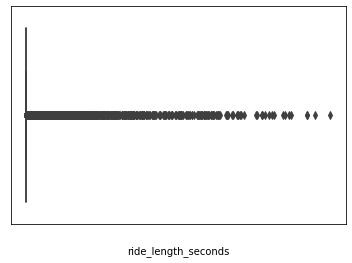

In [13]:
sns.boxplot(x=bike["ride_length_seconds"]).tick_params(axis='both', colors='white')

## Seems like a lot of outliers from the boxplot above

In [14]:
Q1 = np.percentile(bike['ride_length_seconds'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(bike['ride_length_seconds'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [15]:
print("Q1:", round(Q1,2), "seconds", "or", round(Q1/60,2),"minutes")
print("Q3:", round(Q3,2), "seconds", "or", round(Q3/60,2),"minutes")
print("IQR:", round(IQR,2), "seconds", "or", round(IQR/60,2),"minutes")

Q1: 476.0 seconds or 7.93 minutes
Q3: 1601.0 seconds or 26.68 minutes
IQR: 1125.0 seconds or 18.75 minutes


<AxesSubplot:>

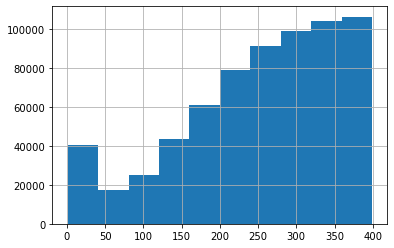

In [16]:
bike.ride_length_seconds[bike.ride_length_seconds<400].hist()

<AxesSubplot:>

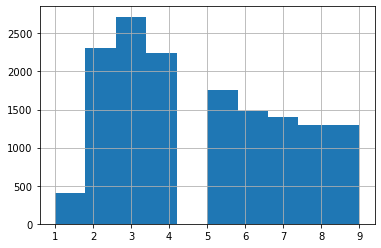

In [17]:
bike.ride_length_seconds[bike.ride_length_seconds<10].hist()

### Seems like the data starts to follow the expected pattern after ride length of 75 seconds
### These might be customers who changed their mind, activated by accident, ect. and they should be looked at differently

In [18]:
Excluded_rides = bike[bike.ride_length_seconds<=55]

In [19]:
bike=bike[bike.ride_length_seconds>55]

### recalculate IQR and quartiles

In [20]:
Q1 = np.percentile(bike['ride_length_seconds'], 25,
                   interpolation = 'midpoint')
Q3 = np.percentile(bike['ride_length_seconds'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [21]:
print("Q1:", round(Q1,2), "seconds", "or", round(Q1/60,2),"minutes")
print("Q3:", round(Q3,2), "seconds", "or", round(Q3/60,2),"minutes")
print("IQR:", round(IQR,2), "seconds", "or", round(IQR/60,2),"minutes")

Q1: 490.0 seconds or 8.17 minutes
Q3: 1616.0 seconds or 26.93 minutes
IQR: 1126.0 seconds or 18.77 minutes


### need to investigate the upper bound as well

<AxesSubplot:>

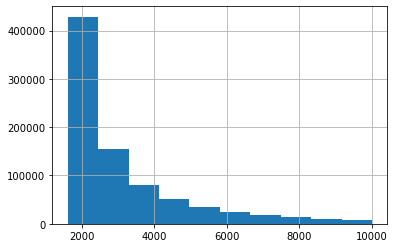

In [22]:
bike.ride_length_seconds[(bike.ride_length_seconds>1618) & (bike.ride_length_seconds<10000)].hist()

### There is no outlying pattern like there was for the values close to 0 so we should simply remove the outliers (values greater than Q3+1.5*IQR)

In [23]:
Excluded_rides=Excluded_rides.append(bike[bike.ride_length_seconds>=3307])

In [24]:
bike=bike[bike.ride_length_seconds<3307]

#### After removing abnormal values, the data follows a right skewed pattern with most rides occuring around 500 seconds

<AxesSubplot:>

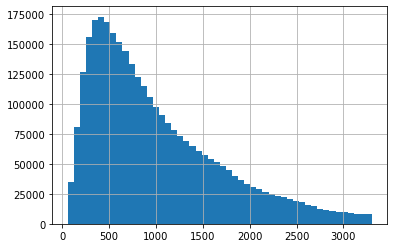

In [25]:
bike.ride_length_seconds.hist(bins=50)

In [30]:
bike.ride_length_seconds.max()

3306.0

In [31]:
bike.to_csv('Bike_preprocessed.csv', index=False)